### Answer with the type of test you would use (assume normal distribution):


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data


### Is there a difference in grades of students on the second floor compared to grades of all students?


One Sample T-Test: scipy.stats.ttest_1samp, 2 tail

### Are adults who drink milk taller than adults who dont drink milk?


Independent T-Test AKA Two sample T-Test: scipy.stats.ttest_ind, 1 tail

### Is the the price of gas higher in texas or in new mexico?


Independent T-Test AKA Two sample T-Test: scipy.stats.ttest_ind, 1 tail

### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
 

ANOVA: scipy.stats.f_oneway

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


#### H0: Average time to sell at office1 == average time to sell at office2

#### Ha: Average time to sell at office1 != average time to sell at office2

In [2]:
office1 = stats.norm(90,15).rvs(40)
office2 = stats.norm(100,20).rvs(50)

In [3]:
print(office1.var())
print(office2.var())

226.975371609834
498.69388054079127


In [6]:
a = 0.05

In [7]:
tstat, pval = stats.ttest_ind(office1, office2)

In [8]:
tstat, pval

(-1.8870510653864327, 0.06245020889188441)

In [9]:
if pval < 0.05:
    print('We can reject Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')

We fail to reject the Null Hypothesis


Because the pval is less than alpha, we can reject the null hypothesis.

### Load the mpg dataset and use it to answer the following questions:


In [10]:
df = data('mpg')


In [11]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [12]:
df['avg_miles'] = (df.cty +df.hwy)/2

In [13]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_miles
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [14]:
df.groupby('year').avg_miles.mean()

year
1999    20.222222
2008    20.076923
Name: avg_miles, dtype: float64

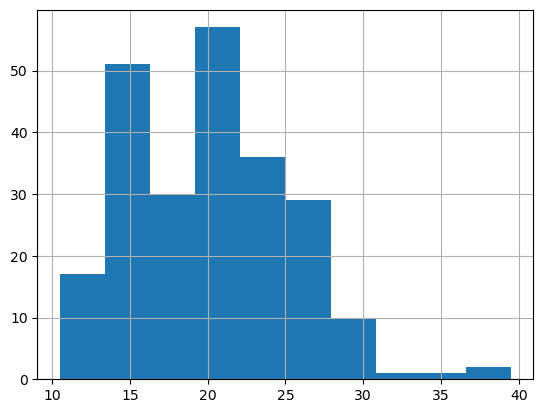

In [15]:
df.avg_miles.hist()
plt.show()

In [16]:
old_sample = df[df.year==1999].avg_miles

<Axes: >

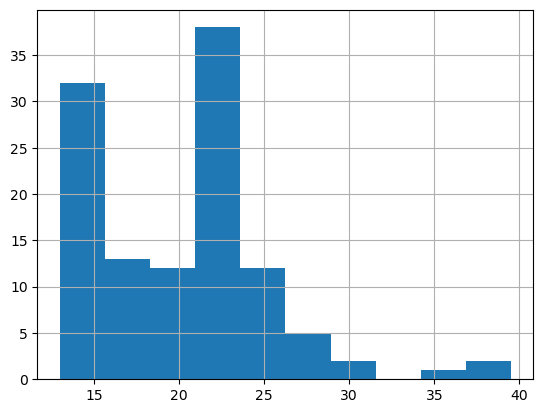

In [17]:
old_sample.hist()

In [18]:
new_sample = df[df.year==2008].avg_miles

<Axes: >

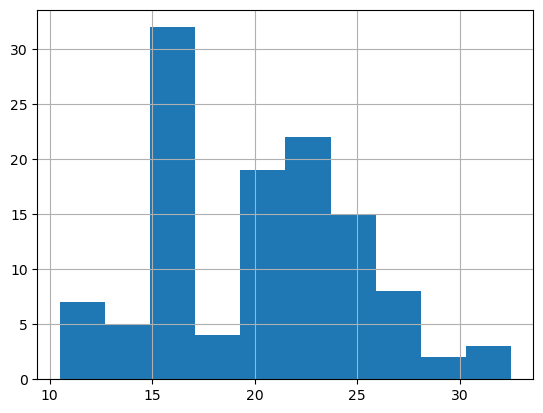

In [19]:
new_sample.hist()

H0: Mean of mile efficiency for cars made in the year 1999 has no difference versus Mean of mile efficiency for cars made in the year 2008

Ha: Mean of mile efficiency for cars made in the year 1999 has differences versus Mean of mile efficiency for cars made in the year 2008

In [20]:
alpha = 0.5

In [21]:
stat, pval = stats.levene(old_sample, new_sample)

In [22]:
pval

0.855517569468803

we cannot reject the idea that there are equal variances in these two groups

In [23]:
t, p = stats.ttest_ind(old_sample, new_sample)
t, p


(0.21960177245940962, 0.8263744040323578)

In [24]:
 p < alpha

False

Failed to Reject Null hypothesis

### Are compact cars more fuel-efficient than the average car?

In [26]:
theoretical_mean = df.avg_miles.mean()
print(theoretical_mean)

compact_mean = df[df['class'] == 'compact'].avg_miles.mean()
print(compact_mean)

20.14957264957265
24.21276595744681


H0: Mean of fuel effeciency of compact cars =< Mean of all mileage

Ha: Mean of fuel effeciency of compact cars > Mean of all mileage

In [27]:
alpha = 0.05

In [28]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

Sample is greater than 30, large enough to assume normal distribution

In [30]:
theoretical_mean = df.avg_miles.mean()
sample = df[df['class'] == 'compact'].avg_miles


In [31]:
tstat, pval = stats.ttest_1samp(sample, theoretical_mean)


In [32]:
tstat, pval


(7.896888573132533, 4.1985637943171486e-10)

In [33]:
if ((pval / 2) < alpha) and (tstat > 0):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')


we can reject the null hypothesis


Ha: Mean of fuel effeciency of compact cars > Mean of all mileage

### Do manual cars get better gas mileage than automatic cars?

In [34]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_miles
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


<Axes: >

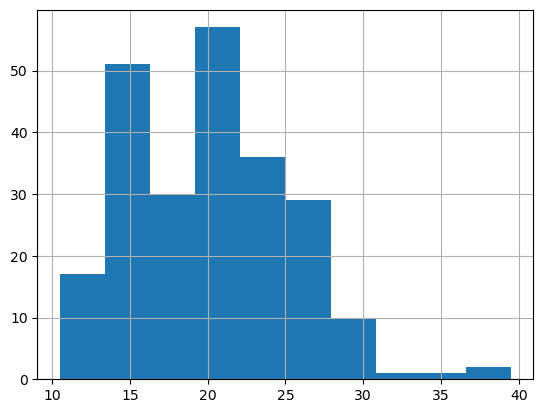

In [35]:
df.avg_miles.hist()

H0: Mean of manual fuel effeciency =< Mean of automatics fuel effeciency

Ha: Mean of manual fuel effeciency > Mean of automatics fuel effeciency

<Axes: >

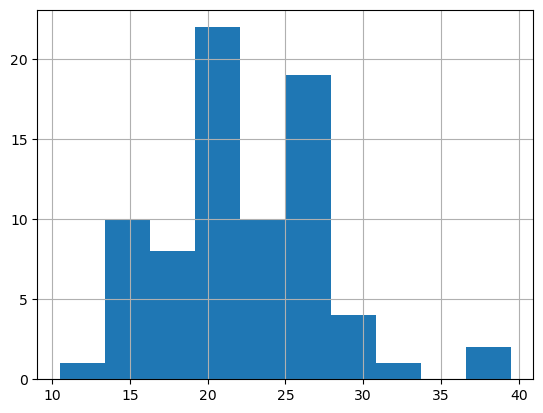

In [36]:
manual_sample = df[df.trans.str.contains('manual')].avg_miles
manual_sample.hist()


<Axes: >

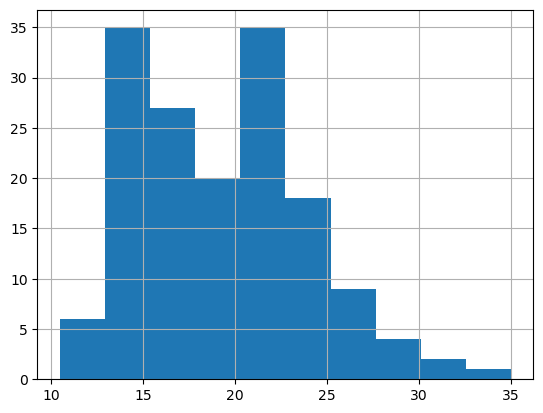

In [37]:
auto_sample = df[df.trans.str.contains('auto')].avg_miles
auto_sample.hist()

In [38]:
mean_a = manual_sample.mean()
mean_b = auto_sample.mean()

In [39]:
mean_a, mean_b

(22.227272727272727, 19.130573248407643)

In [40]:
alpha = 0.05

In [41]:
stat, pval = stats.levene(manual_sample, auto_sample)

In [42]:
pval

0.6545276355131857

In [43]:
t, p = stats.ttest_ind(manual_sample, auto_sample)
t, p

(4.593437735750014, 7.154374401145685e-06)

In [44]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


Ha: Mean of manual fuel effeciency > Mean of automatics fuel effeciency